In [161]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

In [141]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model


In [142]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [157]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [143]:
# reference variables
per1 = {
    "start_time": pd.to_datetime("2009-08-02"), # these dates are relevant for the bluff edge only
    "end_time": pd.to_datetime("2011-07-15"),
    "x_shore_line_start": -1,   # i.e., distance to baseline at start
    "x_bluff_edge_start": 162.01508156899843,   # i.e., distance to baseline at start
    "x_shore_line_end": -1,   # i.e., distance to baseline at end
    "x_bluff_edge_end": 162.4068294126812,   # i.e., distance to baseline at end
}

per2 = {
    "start_time": pd.to_datetime("2012-07-11"), # these dates are relevant for the bluff edge only
    "end_time": pd.to_datetime("2015-07-05"),
    "x_shore_line_start": -1,   # i.e., distance to baseline at start
    "x_bluff_edge_start": 164.52084174135774,   # i.e., distance to baseline at start
    "x_shore_line_end": -1,   # i.e., distance to baseline at end
    "x_bluff_edge_end": 179.48248124206415,   # i.e., distance to baseline at end
}

per3 = {
    "start_time": pd.to_datetime("2016-08-27"), # these dates are relevant for the bluff edge only
    "end_time": pd.to_datetime("2018-07-30"),
    "x_shore_line_start": -1,   # i.e., distance to baseline at start
    "x_bluff_edge_start": 187.25161246050337,   # i.e., distance to baseline at start
    "x_shore_line_end": -1,   # i.e., distance to baseline at end
    "x_bluff_edge_end": 195.1759190877606,   # i.e., distance to baseline at end
}

In [159]:
# fnames = os.listdir('./erosion_rates/')

per = int(2)

fnames = [f'val_per{per}_{i}.csv' for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
run_ids = [f'{fname[:-4]}' for fname in fnames]

print(fnames)
print(run_ids)

['val_per2_3.csv', 'val_per2_4.csv', 'val_per2_5.csv', 'val_per2_6.csv', 'val_per2_7.csv', 'val_per2_8.csv', 'val_per2_9.csv', 'val_per2_10.csv', 'val_per2_11.csv', 'val_per2_12.csv', 'val_per2_13.csv', 'val_per2_14.csv', 'val_per2_15.csv', 'val_per2_16.csv']
['val_per2_3', 'val_per2_4', 'val_per2_5', 'val_per2_6', 'val_per2_7', 'val_per2_8', 'val_per2_9', 'val_per2_10', 'val_per2_11', 'val_per2_12', 'val_per2_13', 'val_per2_14', 'val_per2_15', 'val_per2_16']


In [187]:
total_erosion = dict(dtype=object)

all_run_ids = []
all_erosion_bluff_edge = []
all_erosion_shore_line = []

all_erosion_bluff_edge_data = []

for fname in fnames:
    
    df = pd.read_csv(Path(f'./erosion_rates/{fname}'), parse_dates=['time'])
        
    run_id = fname[:-4]
    
    # get relevant period information
    if 'per1' in run_id:
        per = per1
    elif 'per2' in run_id:
        per = per2
    elif 'per3' in run_id:
        per = per3
    
    start_time = per['start_time']
    end_time = per['end_time']
    
    df_start = df[df['time']==start_time]
    df_end = df[df['time']==end_time]
        
    x_shore_line_start = df_start['x_shore_line'].values[0]
    x_shore_line_end = df_end['x_shore_line'].values[0]
    
    x_bluff_edge_start = df_start['x_bluff_edge'].values[0]
    x_bluff_edge_end = df_end['x_bluff_edge'].values[0]
    
    total_erosion_shore_line = x_shore_line_end - x_shore_line_start
    total_erosion_bluff_edge = x_bluff_edge_end - x_bluff_edge_start
    
    total_erosion[run_id] = {"total_erosion_shore_line": total_erosion_shore_line, 
                             "total_erosion_bluff_edge": total_erosion_bluff_edge}
    
    all_run_ids.append(run_id)
    all_erosion_bluff_edge.append(total_erosion_bluff_edge)
    all_erosion_shore_line.append(total_erosion_shore_line)
    
    all_erosion_bluff_edge_data.append(per['x_bluff_edge_end'] - per['x_bluff_edge_start'])
    
    print(f'completed run {run_id}')

completed run val_per2_3
completed run val_per2_4
completed run val_per2_5
completed run val_per2_6
completed run val_per2_7
completed run val_per2_8
completed run val_per2_9
completed run val_per2_10
completed run val_per2_11
completed run val_per2_12
completed run val_per2_13
completed run val_per2_14
completed run val_per2_15
completed run val_per2_16


In [188]:
print(fnames)
print(all_erosion_bluff_edge)

['val_per2_3.csv', 'val_per2_4.csv', 'val_per2_5.csv', 'val_per2_6.csv', 'val_per2_7.csv', 'val_per2_8.csv', 'val_per2_9.csv', 'val_per2_10.csv', 'val_per2_11.csv', 'val_per2_12.csv', 'val_per2_13.csv', 'val_per2_14.csv', 'val_per2_15.csv', 'val_per2_16.csv']
[np.float64(8.0), np.float64(8.0), np.float64(8.0), np.float64(8.0), np.float64(8.0), np.float64(6.0), np.float64(8.0), np.float64(6.0), np.float64(4.0), np.float64(6.0), np.float64(4.0), np.float64(4.0), np.float64(8.0), np.float64(6.0)]


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_33892\1393297701.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


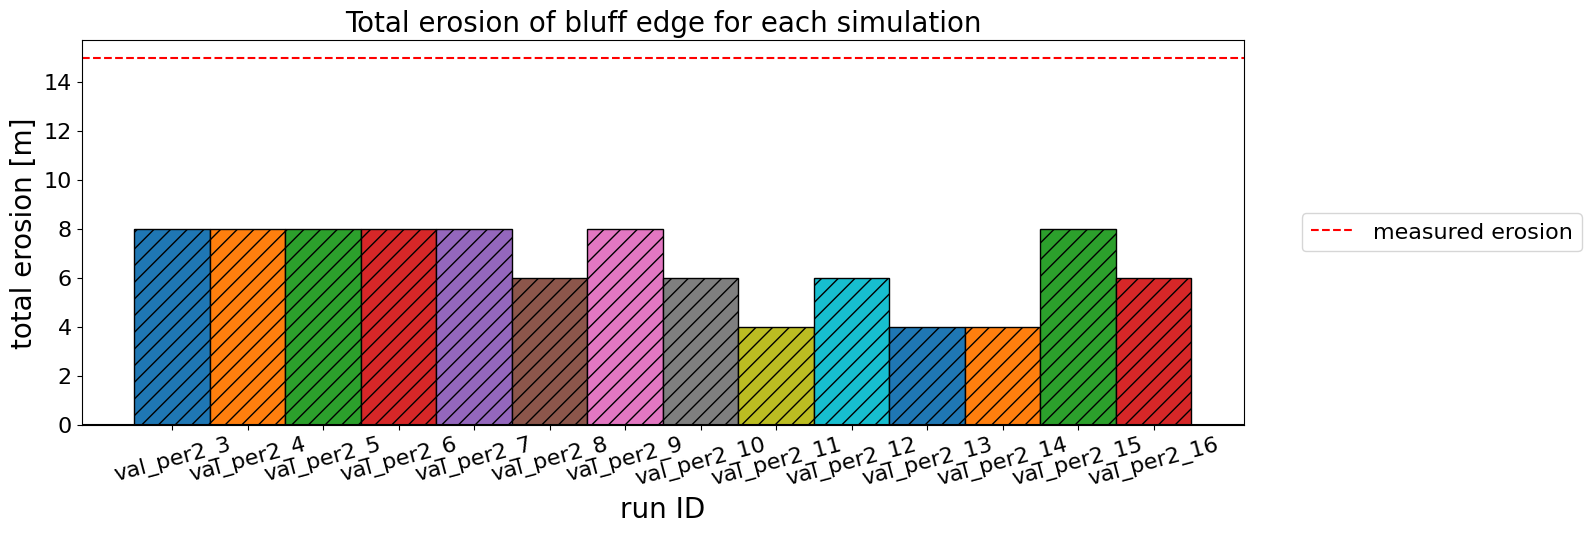

In [189]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(np.arange(len(fnames)), width=1, height=all_erosion_bluff_edge, color=[f'C{i}' for i in np.arange(len(fnames))], ec='k', hatch='//')
# ax.bar(np.arange(len(fnames)) + 0.0, width=0.3, height=all_erosion_shore_line, label='Shore line', fc='C1', ec='k')
# ax.bar(np.arange(len(fnames)) + 0.3, width=0.3, height=all_erosion_bluff_edge_data, label='Bluff edge data', fc='r', ec='k')

ax.axhline(0, color='k')

ax.axhline(all_erosion_bluff_edge_data[0], color='r', ls='--', label='measured erosion')

ax.set_xticks(np.arange(len(fnames)), all_run_ids)
ax.set_xticklabels(all_run_ids, rotation=15)

ax.set_title("Total erosion of bluff edge for each simulation")

ax.set_ylabel('total erosion [m]')
ax.set_xlabel('run ID')

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

fig.show()

So that's total erosion. What about w.r.t. the erosion line?

In [190]:
# first load data
df_be = gpd.read_file(os.path.join(parent, Path("database/ts_datasets/bluff_edges.csv")))
sort_mask = np.argsort(df_be.time.values)
df_be = df_be.iloc[sort_mask]

df_be['time'] = pd.to_datetime(df_be.time.values)
df_be['distance_from_ref'] = np.float32(df_be['distance_from_ref'].values)

df_sl = gpd.read_file(os.path.join(parent, Path("database/ts_datasets/shore_lines.csv")))
sort_mask = np.argsort(df_sl.time.values)
df_sl = df_sl.iloc[sort_mask]

df_sl['time'] = pd.to_datetime(df_sl.time.values)
df_sl['distance_from_ref'] = np.float32(df_sl['distance_from_ref'].values)


df_be.head()

,field_1,time,distance_from_ref,transect_id,ref_point,geometry
3,3,1950-08-02,43.059185,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65624731604254 70.13496685853804)
2,2,1955-07-24,55.670830,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65624832870435 70.13485378355169)
4,4,1969-07-25,84.629684,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.656250653975 70.13459414082698)
11,11,1975-07-07,93.130219,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65625133653052 70.13451792571242)
6,6,1979-07-13,93.873360,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65625139620138 70.13451126277761)


In [191]:
# df = pd.read_csv("erosion_rates/val_per1_2.csv")

# df.head()

Uncomment the cell below to look at different simulations.

In [192]:
# per = int(2)
# fnames = [f'val_per{per}_{i}.csv' for i in [3, 4, 7, 9]]
# run_ids = [f'{fname[:-4]}' for fname in fnames]

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_33892\201767644.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


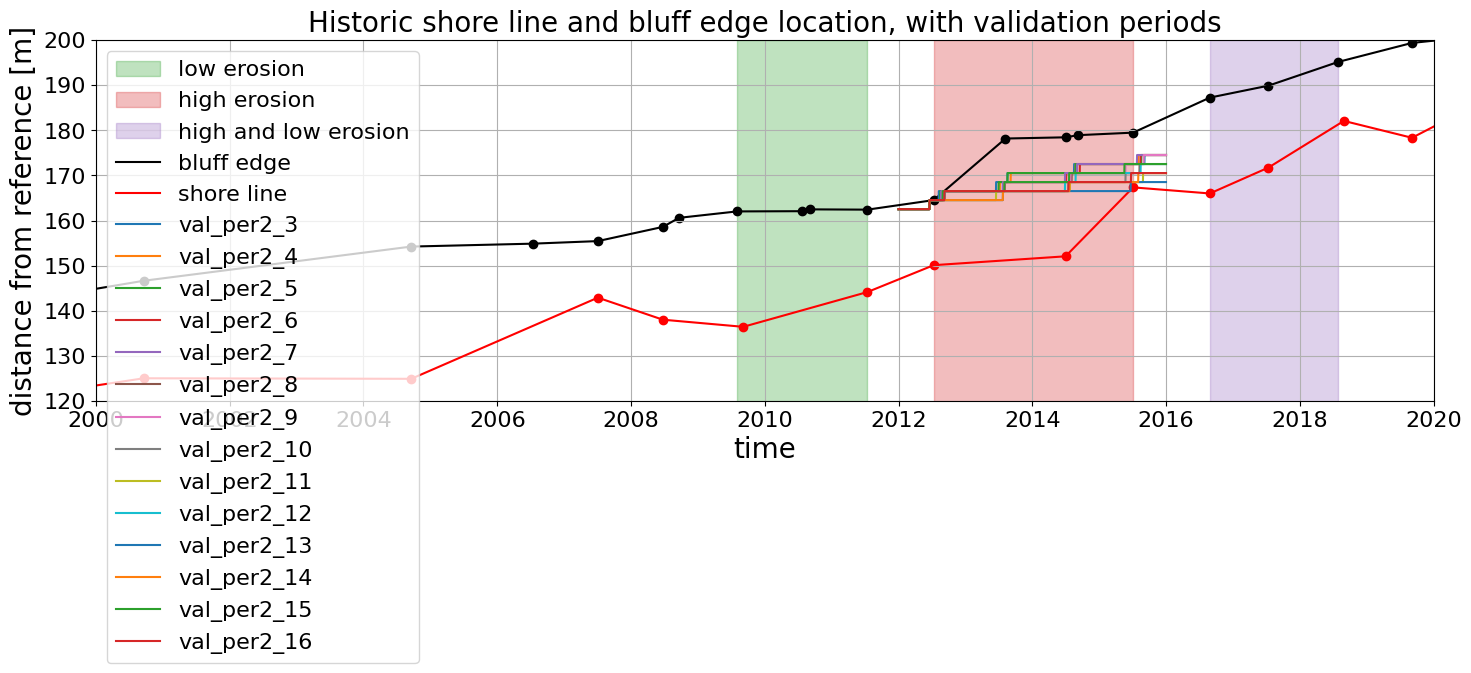

In [193]:
# create figure
fig, ax = plt.subplots(figsize=(15,6))

# fill masks
ax.fill_between([pd.Timestamp('2009-08-02'), pd.Timestamp('2011-07-15')], 0, 200, alpha=0.3, label='low erosion', color='C2')
ax.fill_between([pd.Timestamp('2012-07-11'), pd.Timestamp('2015-07-05')], 0, 200, alpha=0.3, label='high erosion', color='C3')
ax.fill_between([pd.Timestamp('2016-08-27'), pd.Timestamp('2018-07-30')], 0, 200, alpha=0.3, label='high and low erosion', color='C4')

# plot lines
ax.plot(df_be.time.values, df_be.distance_from_ref.values, label='bluff edge', color='k')
ax.plot(df_sl.time.values, df_sl.distance_from_ref.values, label='shore line', color='r')

# plot data points
ax.scatter(df_be.time.values, df_be.distance_from_ref.values, color='k')
ax.scatter(df_sl.time.values, df_sl.distance_from_ref.values, color='r')

#######################################################################################3

i = 0

# plot modelled points
for fname in fnames:
    
    # display(df.head())
    
    df = pd.read_csv(Path(f'./erosion_rates/{fname}'), parse_dates=['time'])
        
    run_id = fname[:-4]
    
    ax.plot(df['time'], df['relative_x_bluff_edge'], color=f'C{i}', label=run_id)
    
    i+= 1
    
#######################################################################################3

# make figure look nice
ax.set_xlim((pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01')))
ax.set_ylim((120, 200))

ax.grid()

ax.set_xlabel('time')
ax.set_ylabel('distance from reference [m]')

ax.set_title('Historic shore line and bluff edge location, with validation periods')

ax.legend(loc='upper left')

fig.tight_layout()

fig.show()

Now let's look at the absolute RMSE, for both calibration and validation. First validation:

In [203]:
# data = {'run_id': ...,'total_RMSE'}
validation_fnames = ['val_per1_2.csv', 'val_per3_2.csv']
# validation_fnames = ['val_per1_best.csv', 'val_per1_fast.csv', 'val_per3_best.csv', 'val_per3_fast.csv']
data = dict()

for fname in fnames + validation_fnames:
    
    # read df    
    df = pd.read_csv(Path(f'./erosion_rates/{fname}'), parse_dates=['time'])
    
    # get time period
    t_start = df['time'].values[0]
    t_end = df['time'].values[-1]

    # get runid
    run_id = fname[:-4]
    
    # get only data points in time period
    df_data = df_be[(df_be['time'] >= t_start) & (df_be['time'] <= t_end)]
    
    # initialize RMSE
    RMSE = 0
    N = 0
    all_abs_errors = []
    
    # loop through those rows to compute RMSE
    for i, row in df_data.iterrows():
        
        # match date to simulation output
        t = row.time
        output_row = df[df['time'] == t]
        
        x_simu = output_row['relative_x_bluff_edge'].values[0]
        x_data = row.distance_from_ref
        
        # print(x_simu)
        
        abs_error = abs(x_simu - x_data)
        
        RMSE += abs_error**2
        N += 1
        all_abs_errors.append(abs_error)
        
    RMSE = np.sqrt(RMSE / N)
        
    # get computational time from dataset
    if "per1" in fname:
        final_output_step = "0000026268"
    elif "per2" in fname:
        final_output_step = "0000035052"
    elif "per3" in fname:
        final_output_step = "0000026292"
        
    fpath = f"p:/11210070-usgscoop-202324-arcticxb/runs/{fname[:-4]}/{final_output_step}.nc"
    ds = xr.load_dataset(fpath)
    comp_time = ds["cumulative_computational_time"].values
    ds.close()

    # save result in dictionary    
    data[run_id] = {'all_abs_errors': all_abs_errors, 'N': N, "RMSE": RMSE, "comp_time[s]": comp_time}
    
    # done with this timestep
    print(f'completed run {run_id}')
    
# print(data)

data_df = {
    'runid': [i for i in data.keys()],
    'RMSE': [dic['RMSE'] for key, dic in data.items()],
    'run_time[s]' : [dic['comp_time[s]'] for key, dic in data.items()]
    }

df_RMSE = pd.DataFrame(data_df)

display(df_RMSE.head())

# df_RMSE.to_csv()

completed run val_per2_3
completed run val_per2_4
completed run val_per2_5
completed run val_per2_6
completed run val_per2_7
completed run val_per2_8
completed run val_per2_9
completed run val_per2_10
completed run val_per2_11
completed run val_per2_12
completed run val_per2_13
completed run val_per2_14
completed run val_per2_15
completed run val_per2_16
completed run val_per1_2
completed run val_per3_2


,runid,RMSE,run_time[s]
0,val_per2_3,7.006838,175214.62801861763
1,val_per2_4,7.006838,156180.24080324173
2,val_per2_5,7.006838,148965.2197678089
3,val_per2_6,7.883910,69723.97692990303
4,val_per2_7,7.006838,61140.368701934814


Differentiate between validation and calibration dataframe.

In [204]:
df_RMSE_cal = df_RMSE.iloc[-4:,:]
df_RMSE = df_RMSE.iloc[:-4,:]

display(df_RMSE_cal)
display(df_RMSE.tail())

,runid,RMSE,run_time[s]
12,val_per2_15,7.883910,61350.91150140762
13,val_per2_16,9.659750,22000.90842795372
14,val_per1_2,6.419801,69242.3825097084
15,val_per3_2,1.171954,141931.4852912426


,runid,RMSE,run_time[s]
7,val_per2_10,9.659750,25211.38484811783
8,val_per2_11,10.063800,13739.265047073364
9,val_per2_12,8.777841,34905.84769964218
10,val_per2_13,10.507181,12421.83361530304
11,val_per2_14,10.063800,28842.05796647072


In [205]:
# get the run with the best RMSE
arg_best = np.argmin(df_RMSE.RMSE.values)

print(f'Best (lowest) RMSE: {df_RMSE.iloc[arg_best]['runid']} with an RMSE of {df_RMSE.iloc[arg_best]['RMSE']:.2f}')

Best (lowest) RMSE: val_per2_3 with an RMSE of 7.01


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_33892\3507049109.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


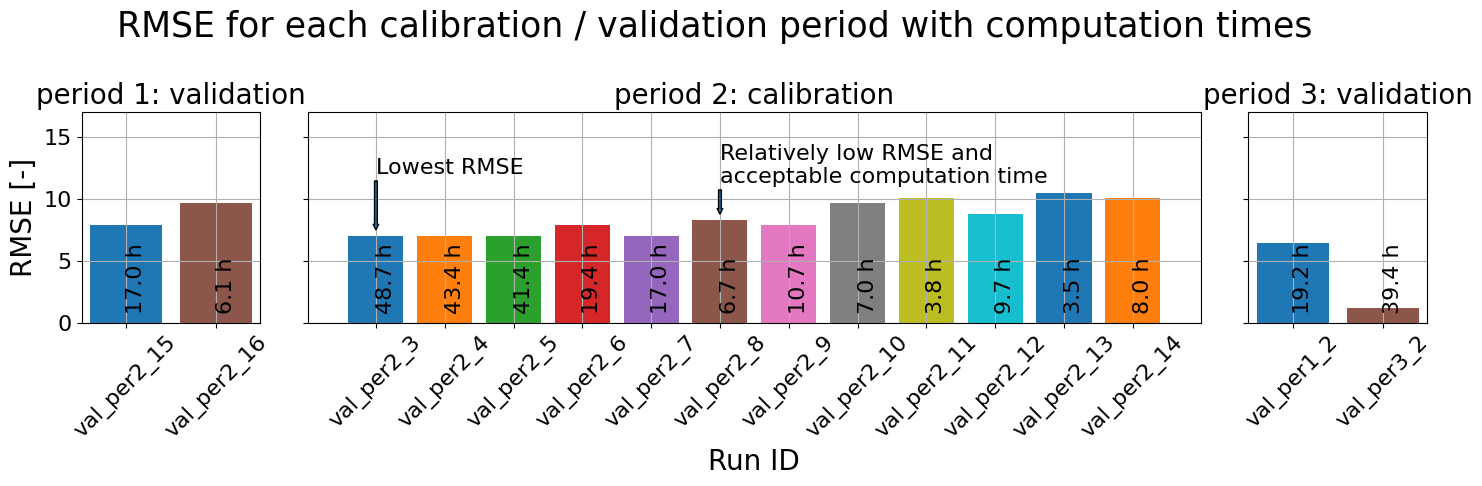

In [251]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [1, 5, 1]})

ax[0].bar(
    x=[1, 2], 
    height=df_RMSE_cal.iloc[0:2]['RMSE'], 
    width=0.8, 
    color=[[f"C{i}" for i in range(len(df_RMSE))][arg_best]] + ['C5']
    )

ax[1].bar(
    x=np.arange(len(df_RMSE)), 
    height=df_RMSE['RMSE'], 
    width=0.8, 
    color=[f"C{i}" for i in range(len(df_RMSE))]
    )

ax[2].bar(
    x=[1, 2], 
    height=df_RMSE_cal.iloc[2:4]['RMSE'], 
    width=0.8, 
    color=[[f"C{i}" for i in range(len(df_RMSE))][arg_best]] + ['C5']
    )

ax[0].set_ylim((0, 17))
ax[1].set_ylim((0, 17))
ax[2].set_ylim((0, 17))

ax[0].set_xticks([1, 2], df_RMSE_cal.iloc[0:2,:]['runid'])
ax[0].set_xticklabels(df_RMSE_cal.iloc[0:2,:]['runid'], rotation=45)
ax[1].set_xticks(np.arange(len(df_RMSE)), df_RMSE['runid'])
ax[1].set_xticklabels(df_RMSE['runid'], rotation=45)
ax[2].set_xticks([1, 2], df_RMSE_cal.iloc[2:4,:]['runid'])
ax[2].set_xticklabels(df_RMSE_cal.iloc[2:4,:]['runid'], rotation=45)

ax[1].annotate(
    'Lowest RMSE', 
    (np.arange(len(df_RMSE))[arg_best], df_RMSE['RMSE'][arg_best] + .5), 
    (np.arange(len(df_RMSE))[arg_best], df_RMSE['RMSE'][arg_best] + 5),
    arrowprops={'width':2, 'headwidth':4, 'headlength':4}
)

ax[1].annotate(
    'Relatively low RMSE and\nacceptable computation time', 
    (5, df_RMSE['RMSE'][5] + .5), 
    (5, df_RMSE['RMSE'][5] + 3),
    arrowprops={'width':2, 'headwidth':4, 'headlength':4}
)

for i, row in df_RMSE.iterrows():
    comp_time_h = row['run_time[s]'] / 3600
    ax[1].annotate(f"{comp_time_h:.1f} h", (np.arange(len(df_RMSE))[i], 1), rotation=90)
    
comp_time_h = df_RMSE_cal.iloc[0,:]['run_time[s]'] / 3600
ax[0].annotate(f"{comp_time_h:.1f} h", (1, 1), rotation=90)
comp_time_h = df_RMSE_cal.iloc[1,:]['run_time[s]'] / 3600
ax[0].annotate(f"{comp_time_h:.1f} h", (2, 1), rotation=90)
comp_time_h = df_RMSE_cal.iloc[2,:]['run_time[s]'] / 3600
ax[2].annotate(f"{comp_time_h:.1f} h", (1, 1), rotation=90)
comp_time_h = df_RMSE_cal.iloc[3,:]['run_time[s]'] / 3600
ax[2].annotate(f"{comp_time_h:.1f} h", (2, 1), rotation=90)

ax[0].set_ylabel('RMSE [-]')
ax[1].set_xlabel('Run ID')

ax[0].set_title('period 1: validation')
ax[1].set_title('period 2: calibration')
ax[2].set_title('period 3: validation')

ax[0].grid()
ax[1].grid()
ax[2].grid()

fig.suptitle('RMSE for each calibration / validation period with computation times')

fig.tight_layout()

fig.show()

figname = 'RMSE_integrated_model.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

Then remake erosion timeseries plot for the run with lowest RMSE and with lines for validation as well (lower alpha for bad runs). 

Line2D(bluff edge)
Line2D(shore line)


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_33892\2171826354.py:112: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


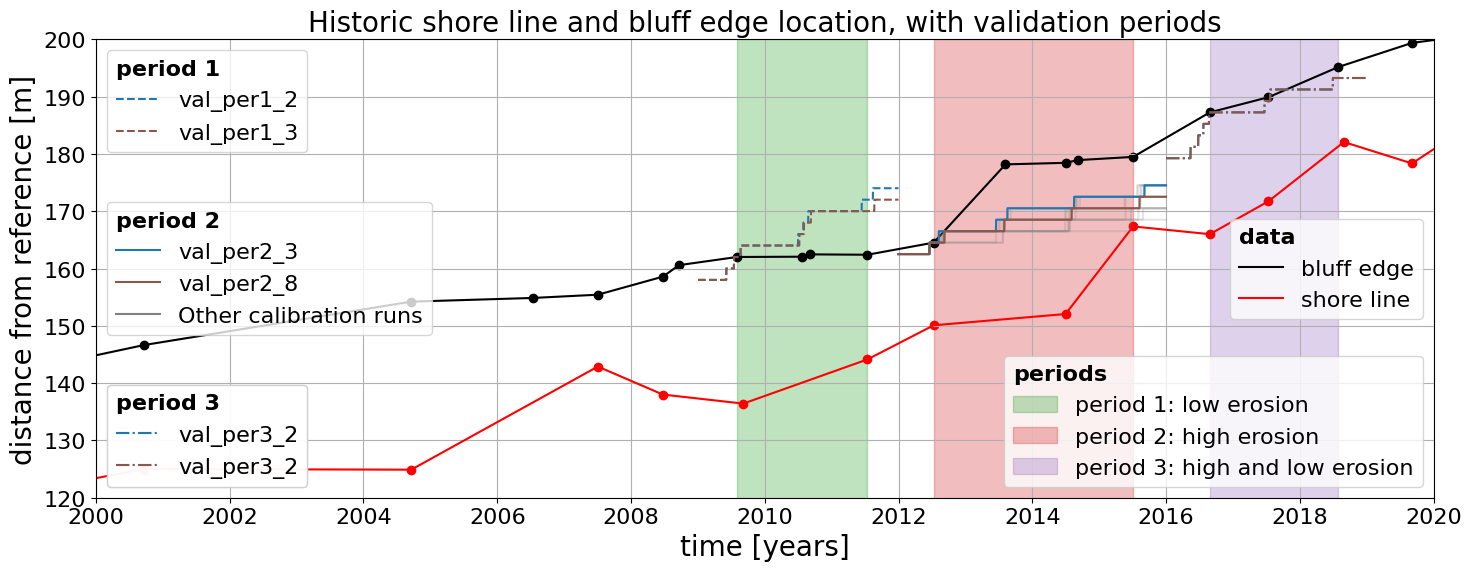

In [250]:
# create figure
fig, ax = plt.subplots(figsize=(15,6))

# fill masks
patch1 = ax.fill_between([pd.Timestamp('2009-08-02'), pd.Timestamp('2011-07-15')], 0, 200, alpha=0.3, label='period 1: low erosion', color='C2')
patch2 = ax.fill_between([pd.Timestamp('2012-07-11'), pd.Timestamp('2015-07-05')], 0, 200, alpha=0.3, label='period 2: high erosion', color='C3')
patch3 = ax.fill_between([pd.Timestamp('2016-08-27'), pd.Timestamp('2018-07-30')], 0, 200, alpha=0.3, label='period 3: high and low erosion', color='C4')

# plot lines
be_line = ax.plot(df_be.time.values, df_be.distance_from_ref.values, label='bluff edge', color='k')[0]
sl_line = ax.plot(df_sl.time.values, df_sl.distance_from_ref.values, label='shore line', color='r')[0]

# plot data points
ax.scatter(df_be.time.values, df_be.distance_from_ref.values, color='k')
ax.scatter(df_sl.time.values, df_sl.distance_from_ref.values, color='r')

#######################################################################################3

i = 0

# plot modelled points
for fname in fnames:
    
    # display(df.head())
    
    df = pd.read_csv(Path(f'./erosion_rates/{fname}'), parse_dates=['time'])
        
    run_id = fname[:-4]
    
    ax.plot(
        df['time'], 
        df['relative_x_bluff_edge'], 
        # color=f'C{i}',
        color='grey',
        alpha=0.2,
        # label=run_id
        )
    
    i+= 1
    
l_grey = ax.plot([], [], color='grey', label='Other calibration runs')[0]
    
# plot good model runs (val_per1_best, val_per1_fast, val_per2_3, val_per2_8, val_per3_best, val_per3_fast)
# ids = ('val_per1_best', 'val_per1_fast', 'val_per2_3', 'val_per2_8', 'val_per3_best', 'val_per3_fast')
ids = ('val_per1_2', 'val_per1_3', 'val_per2_3', 'val_per2_8', 'val_per3_2', 'val_per3_2')

runid = ids[0]
df0 = pd.read_csv(Path(f'./erosion_rates/{runid}.csv'), parse_dates=['time'])
l0 = ax.plot(df0['time'], df0['relative_x_bluff_edge'], color='C0', label=runid, ls='--')[0]

runid = ids[1]
df1 = pd.read_csv(Path(f'./erosion_rates/{runid}.csv'), parse_dates=['time'])
l1 = ax.plot(df1['time'], df1['relative_x_bluff_edge'], color='C5', label=runid, ls='--')[0]

runid = ids[2]
df2 = pd.read_csv(Path(f'./erosion_rates/{runid}.csv'), parse_dates=['time'])
l2 = ax.plot(df2['time'], df2['relative_x_bluff_edge'], color='C0', label=runid)[0]

runid = ids[3]
df3 = pd.read_csv(Path(f'./erosion_rates/{runid}.csv'), parse_dates=['time'])
l3 = ax.plot(df3['time'], df3['relative_x_bluff_edge'], color='C5', label=runid)[0]

runid = ids[4]
df4 = pd.read_csv(Path(f'./erosion_rates/{runid}.csv'), parse_dates=['time'])
l4 = ax.plot(df4['time'], df4['relative_x_bluff_edge'], color='C0', label=runid, ls='-.')[0]

runid = ids[5]
df5 = pd.read_csv(Path(f'./erosion_rates/{runid}.csv'), parse_dates=['time'])
l5 = ax.plot(df5['time'], df5['relative_x_bluff_edge'], color='C5', label=runid, ls='-.')[0]

# lines = [l0, l1 ,l2, l3, l4, l5]


#######################################################################################3

# make figure look nice
ax.set_xlim((pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01')))
ax.set_ylim((120, 200))

ax.grid()

ax.set_xlabel('time [years]')
ax.set_ylabel('distance from reference [m]')

ax.set_title('Historic shore line and bluff edge location, with validation periods')

# print([patch.get_label() for patch in [patch1, patch2, patch3]])
print(be_line)
print(sl_line)

leg1 = plt.legend([patch1, patch2, patch3], [patch.get_label() for patch in [patch1, patch2, patch3]], loc='lower right', title='periods', title_fontproperties=tfp, alignment='left')
leg2 = plt.legend([be_line, sl_line], [line.get_label() for line in [be_line, sl_line]], loc='center right', title='data', title_fontproperties=tfp, alignment='left')

tfp = {'weight': 'bold'}

leg3 = plt.legend([l0, l1], [l.get_label() for l in [l0, l1]], loc='upper left', title='period 1', title_fontproperties=tfp, alignment='left')
leg4 = plt.legend([l2, l3, l_grey], [l.get_label() for l in [l2, l3, l_grey]], loc='center left', title='period 2', title_fontproperties=tfp, alignment='left')
leg5 = plt.legend([l4, l5], [l.get_label() for l in [l4, l5]], loc='lower left', title='period 3', title_fontproperties=tfp, alignment='left')

# print(leg1.legend_handles)

ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)
ax.add_artist(leg4)
ax.add_artist(leg5)

# ax.legend(loc='upper left')

fig.tight_layout()

fig.show()

figname = 'erosion_timeseries_integrated_model.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

Then, it's sensitivity time.